<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Selenium과-BeautifulSoup을-이용한-데이터-획득-준비-작업" data-toc-modified-id="Selenium과-BeautifulSoup을-이용한-데이터-획득-준비-작업-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Selenium과 BeautifulSoup을 이용한 데이터 획득 준비 작업</a></span><ul class="toc-item"><li><span><a href="#원하는-탭으로-이동" data-toc-modified-id="원하는-탭으로-이동-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>원하는 탭으로 이동</a></span></li><li><span><a href="#시도,-구시군-option-list-확보---test" data-toc-modified-id="시도,-구시군-option-list-확보---test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>시도, 구시군 option list 확보 - test</a></span></li><li><span><a href="#필요한-데이터만-가져오기----test" data-toc-modified-id="필요한-데이터만-가져오기----test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>필요한 데이터만 가져오기 -  test</a></span></li></ul></li><li><span><a href="#19대-대선-개표-결과-데이터-수집" data-toc-modified-id="19대-대선-개표-결과-데이터-수집-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>19대 대선 개표 결과 데이터 수집</a></span></li><li><span><a href="#각-후보의-득표율과-지역-ID-정리하기" data-toc-modified-id="각-후보의-득표율과-지역-ID-정리하기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>각 후보의 득표율과 지역 ID 정리하기</a></span><ul class="toc-item"><li><span><a href="#지역별-좌표-정보-draw_korea의-ID와-일치-시키기" data-toc-modified-id="지역별-좌표-정보-draw_korea의-ID와-일치-시키기-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>지역별 좌표 정보 draw_korea의 ID와 일치 시키기</a></span></li><li><span><a href="#두-데이터-합치기" data-toc-modified-id="두-데이터-합치기-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>두 데이터 합치기</a></span></li></ul></li><li><span><a href="#19대-대선-결과-득표율-시각화" data-toc-modified-id="19대-대선-결과-득표율-시각화-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>19대 대선 결과 득표율 시각화</a></span><ul class="toc-item"><li><span><a href="#이전-5장에서-만든-경계선,-drawKorea-함수-가져오기" data-toc-modified-id="이전-5장에서-만든-경계선,-drawKorea-함수-가져오기-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>이전 5장에서 만든 경계선, drawKorea 함수 가져오기</a></span></li><li><span><a href="#문재인-후보-vs-홍준표-후보---득표율-격차-시각화" data-toc-modified-id="문재인-후보-vs-홍준표-후보---득표율-격차-시각화-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>문재인 후보 vs 홍준표 후보 - 득표율 격차 시각화</a></span></li><li><span><a href="#문재인-후보-vs-안철수-후보---득표율-격차-시각화" data-toc-modified-id="문재인-후보-vs-안철수-후보---득표율-격차-시각화-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>문재인 후보 vs 안철수 후보 - 득표율 격차 시각화</a></span></li><li><span><a href="#안철수-후보-vs-홍준표-후보---득표율-격차-시각화" data-toc-modified-id="안철수-후보-vs-홍준표-후보---득표율-격차-시각화-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>안철수 후보 vs 홍준표 후보 - 득표율 격차 시각화</a></span></li><li><span><a href="#Folium을-이용한-시각화---문재인-후보-vs-홍준표-후보---득표율-격차-시각화" data-toc-modified-id="Folium을-이용한-시각화---문재인-후보-vs-홍준표-후보---득표율-격차-시각화-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Folium을 이용한 시각화 - 문재인 후보 vs 홍준표 후보 - 득표율 격차 시각화</a></span></li></ul></li></ul></div>

# Selenium과 BeautifulSoup을 이용한 데이터 획득 준비 작업

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from selenium import webdriver
import time

In [3]:
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.get('http://info.nec.go.kr/')

## 원하는 탭으로 이동

- 개발자도구의 sources탭에서 보면, left(hidden.html), main(main_load_.xhtml) 두개의 프래임 구조로 되어있음

In [4]:
# 해당 사이트가 프레임 구조로 되어있음
driver.switch_to.default_content()   # 상위 프레임으로 돌어가는 명령   (위치가 잘못되어있을 수도 있으니, 초기화 한번 해줬다고 생각)
driver.switch_to.frame('main')     # 데이터가 있는 'main'프레임으로 이동

In [5]:
# '역대선거'로 이동 (xpath 복붙 & 클릭)
driver.find_element_by_xpath("""//*[@id="header"]/ul[1]/li[2]/a""").click()

In [6]:
# '투개표' 항목으로 이동 (xpath 복붙 & 클릭)
driver.find_element_by_xpath("""//*[@id="presubmu"]/li[4]/a""").click()

In [7]:
# '개표현황(투표구별)'로 이동 (xpath 복붙 & 클릭)
driver.find_element_by_xpath("""//*[@id="header"]/div[4]/ul/li[7]/a""").click()

In [8]:
# '대통령선거' (xpath 복붙 & 클릭)
driver.find_element_by_xpath("""//*[@id="electionType1"]""").click()

## 시도, 구시군 option list 확보 - test

In [11]:
# 시도
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name('option')
sido_names_values = [option.text for option in sido_list]     # option tag의 text만 가져오면, 시도 리스트 완성
sido_names_values = sido_names_values[1:]     # '▽ 선 택'  제외하고 다음 것 부터
sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [12]:
# 시도 - 서울특별시로 옵션 설정
element = driver.find_element_by_id('cityCode')
element.send_keys(sido_names_values[0])   # 시도를 서울특별시로 설정

In [13]:
# 시도별 - 서울특별시 구시군
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name('option')
sigun_names_values = [option.text for option in sigun_list]     # option tag의 text만 가져오면, 시도 리스트 완성
sigun_names_values = sigun_names_values[1:]     # '▽ 선 택'  제외하고 다음 것 부터
len(sigun_names_values), sigun_names_values

(25,
 ['종로구',
  '중구',
  '용산구',
  '성동구',
  '광진구',
  '동대문구',
  '중랑구',
  '성북구',
  '강북구',
  '도봉구',
  '노원구',
  '은평구',
  '서대문구',
  '마포구',
  '양천구',
  '강서구',
  '구로구',
  '금천구',
  '영등포구',
  '동작구',
  '관악구',
  '서초구',
  '강남구',
  '송파구',
  '강동구'])

In [14]:
# 구시군 - 종로구로 옵션 설정
element = driver.find_element_by_id('townCode')
element.send_keys(sigun_names_values[0])

In [15]:
# 검색 버튼 클릭
driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()

## 필요한 데이터만 가져오기 -  test

In [16]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [17]:
# '선거인수' 데이터: td tag alignR calss
tmp = soup.find_all('td','alignR')
tmp

[<td class="alignR">133,769</td>,
 <td class="alignR">102,566</td>,
 <td class="alignR">42,512</td>,
 <td class="alignR">22,325</td>,
 <td class="alignR">22,313</td>,
 <td class="alignR">7,412</td>,
 <td class="alignR">7,113</td>,
 <td class="alignR">228</td>,
 <td class="alignR">5</td>,
 <td class="alignR">78</td>,
 <td class="alignR">31</td>,
 <td class="alignR">63</td>,
 <td class="alignR">26</td>,
 <td class="alignR">47</td>,
 <td class="alignR">49</td>,
 <td class="alignR">102,202</td>,
 <td class="alignR">364</td>,
 <td class="alignR">31,203</td>,
 <td class="alignR">218</td>,
 <td class="alignR">206</td>,
 <td class="alignR">64</td>,
 <td class="alignR">42</td>,
 <td class="alignR">65</td>,
 <td class="alignR">8</td>,
 <td class="alignR">15</td>,
 <td class="alignR">0</td>,
 <td class="alignR">1</td>,
 <td class="alignR">3</td>,
 <td class="alignR">1</td>,
 <td class="alignR">0</td>,
 <td class="alignR">0</td>,
 <td class="alignR">0</td>,
 <td class="alignR">2</td>,
 <td class="

In [18]:
tmp[1:5]  # 투표수, 문재인, 홍준표, 안철수 득표수 알 수 있음

[<td class="alignR">102,566</td>,
 <td class="alignR">42,512</td>,
 <td class="alignR">22,325</td>,
 <td class="alignR">22,313</td>]

# 19대 대선 개표 결과 데이터 수집
- test를 통해 옵션 리스트 얻는 법, 옵션 설정해서 검색, 원하는 데이터 가져오는 법을 알 수 있었음
- 해당 방법들을 통해 수집 진행

In [19]:
# 시도별 구시군 list 모두 확보
from tqdm.notebook import tqdm

sido_name_list = []
sigun_name_list = []

for sido_value in tqdm(sido_names_values):
    # 시도 옵션 설정
    element = driver.find_element_by_id('cityCode')
    element.send_keys(sido_value)
    
    time.sleep(2)
    
    # 해당 시도의 구시군 list 얻기
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name("option")
    sigun_names_values = [option.text for option in sigun_list]
    sigun_names_values = sigun_names_values[1:]
    
    # list에 append
    for sigun_value in sigun_names_values:
        sido_name_list.append(sido_value)
        sigun_name_list.append(sigun_value)

In [20]:
# dataframe 저장
election_result = pd.DataFrame({'광역시도':sido_name_list, '시군':sigun_name_list})
election_result

,광역시도,시군
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,용산구
3,서울특별시,성동구
4,서울특별시,광진구
...,...,...
245,경상남도,산청군
246,경상남도,거창군
247,경상남도,합천군
248,제주특별자치도,제주시


In [21]:
election_result.isnull().sum()

광역시도    0
시군      0
dtype: int64

In [22]:
# 득표수 수집하는 함수 생성
def get_vote_info(n):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    tmp= soup.find_all('td','alignR')
    tmp_values =[float(tmp_val.get_text().replace(',','')) for tmp_val in tmp[1:5]]
    
    pop[n] = tmp_values[0]    # 투표수
    moon[n] = tmp_values[1]   # 문재인 득표수
    hong[n] = tmp_values[2]   # 홍준표 득표수
    ahn[n] = tmp_values[3]    # 안철수 득표수

In [23]:
# error일 경우
def fail_procedure(n):
    pop[n] = np.nan
    moon[n] = np.nan
    hong[n] = np.nan
    ahn[n] = np.nan

In [24]:
# 최종 결과가 저장될 list 생성
pop = [np.nan]*len(election_result)
moon = [np.nan]*len(election_result)
hong = [np.nan]*len(election_result)
ahn = [np.nan]*len(election_result)

len(pop), len(moon), len(hong), len(ahn)

(250, 250, 250, 250)

In [25]:
# 데이터 수집 진행
for n in tqdm(election_result.index):
    try:
        # 시도 설정
        element = driver.find_element_by_id('cityCode')
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(1)
        
        # 구시군 설정
        element = driver.find_element_by_id('townCode')
        element.send_keys(election_result['시군'][n])
        
        time.sleep(1)
        
        # 검색 버튼 클릭
        driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
        time.sleep(2)
        
        # 필요 데이터만 수집 함수
        get_vote_info(n)
        
    except:
        print('---error---')
        fail_procedure(n)  # nan으로 저장

---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---error---
---e

In [26]:
election_result['pop'] = pop
election_result['moon'] = moon
election_result['hong'] = hong
election_result['ahn'] = ahn
election_result

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0
...,...,...,...,...,...,...
245,경상남도,산청군,NaN,NaN,NaN,NaN
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0
247,경상남도,합천군,NaN,NaN,NaN,NaN
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0


In [40]:
# error난 곳 - 결측치 있는 index만 다시 수집
re_try_index = election_result[election_result['pop'].isnull()].index

# 데이터 수집 진행
for n in tqdm(re_try_index):
    try:
        # 시도 설정
        element = driver.find_element_by_id('cityCode')
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(2)
        
        # 구시군 설정
        element = driver.find_element_by_id('townCode')
        element.send_keys(election_result['시군'][n])
        
        time.sleep(2)
        
        # 검색 버튼 클릭
        driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
        time.sleep(1)
        
        # 필요 데이터만 수집 함수
        get_vote_info(n)
        
    except:
        print('---error---')
        fail_procedure(n)  # nan으로 저장

In [44]:
driver.close()

In [41]:
election_result['pop'] = pop
election_result['moon'] = moon
election_result['hong'] = hong
election_result['ahn'] = ahn
election_result

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0
...,...,...,...,...,...,...
245,경상남도,산청군,24513.0,6561.0,12544.0,2753.0
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0


In [42]:
election_result.isnull().sum()

광역시도    0
시군      0
pop     0
moon    0
hong    0
ahn     0
dtype: int64

In [43]:
election_result.to_csv('data/05. election_result.csv', index=False, encoding='utf-8', sep=',')

# 각 후보의 득표율과 지역 ID 정리하기

In [45]:
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0


In [48]:
# 지도 표시용 광역시도 이름 정리
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산'] else '' for name in sido_candi]
sido_candi

['서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '대전',
 '대전',
 '대전',
 '대전',
 '대전',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [47]:
# 구시군 - 중랑구 -> 중랑, 서초구 -> 서초,.. 등으로 변경
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [49]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군'][n]
    # 광역시가 아니지만, 행정구를 가지고 있는 지역에 대해 '안양 동안' 등과 같이 정리하는 코드
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0] + ' ' + cut_char_sigu(re.split('시', each)[1])     # 시 + ' ' + 구
    else:
        sigun_candi[n] = cut_char_sigu(each)
sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양구

In [50]:
# 광역시도 이름 저장된 sido_candi와 정리된 시군구 이름이 저장된 sigun_candi 합치기 = '광역시도 시군구' ex. '서울 종로',.. 
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(len(sigun_candi))]

ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]   # 첫글자가 공백(' ')인 경우 처리
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]   # 세종시 예외 처리

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

In [51]:
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군,pop,moon,hong,ahn,ID
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진
5,서울특별시,동대문구,236092.0,98958.0,51631.0,53359.0,서울 동대문
6,서울특별시,중랑구,265706.0,111450.0,56545.0,62778.0,서울 중랑
7,서울특별시,성북구,295866.0,129263.0,57584.0,66518.0,서울 성북
8,서울특별시,강북구,210614.0,89645.0,42268.0,51669.0,서울 강북
9,서울특별시,도봉구,229233.0,94898.0,47461.0,55600.0,서울 도봉


In [52]:
# 각 후보별 특표수 계산 = (해당후보 득표수 / 전체 투표자수)*100
election_result[['rate_moon','rate_hong','rate_ahn']] = election_result[['moon','hong','ahn']].div(election_result['pop'], axis=0)  # 행단위로
election_result[['rate_moon','rate_hong','rate_ahn']] *= 100
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249


In [53]:
# 문 후보 득표율 높은순
election_result.sort_values(by = 'rate_moon', ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
182,전라남도,순천시,181451.0,122595.0,4525.0,40429.0,순천,67.563695,2.493786,22.280946
166,전라북도,전주시덕진구,187921.0,125375.0,5183.0,40188.0,전주 덕진,66.716865,2.758074,21.385582
165,전라북도,전주시완산구,236383.0,157637.0,7003.0,50506.0,전주 완산,66.687114,2.962565,21.366173
175,전라북도,장수군,16079.0,10714.0,717.0,3353.0,장수,66.633497,4.459233,20.853287
184,전라남도,광양시,96384.0,63544.0,4100.0,20080.0,광양,65.927955,4.253818,20.833333
173,전라북도,진안군,18107.0,11918.0,819.0,3904.0,진안,65.819849,4.523113,21.560722
172,전라북도,완주군,62470.0,41057.0,2107.0,13897.0,완주,65.722747,3.372819,22.245878
168,전라북도,익산시,192208.0,123422.0,6470.0,45737.0,익산,64.212728,3.366145,23.795576
170,전라북도,남원시,55371.0,35539.0,1939.0,13854.0,남원,64.183417,3.501833,25.020317
63,광주광역시,광산구,248209.0,159119.0,3630.0,65402.0,광주 광산,64.106862,1.462477,26.349568


- 전라도 지역의 순천, 전주, 장수 등 순으로 높게 나타남

In [54]:
# 홍 후보 득표율 높은순
election_result.sort_values(by = 'rate_hong', ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
219,경상북도,군위군,17627.0,2251.0,11651.0,1939.0,군위,12.770182,66.097464,11.000170
220,경상북도,의성군,37855.0,5365.0,23790.0,4767.0,의성,14.172500,62.845067,12.592788
223,경상북도,영덕군,26125.0,3786.0,16314.0,3231.0,영덕,14.491866,62.445933,12.367464
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
216,경상북도,고령군,22396.0,3754.0,13248.0,2600.0,고령,16.761922,59.153420,11.609216
213,경상북도,예천군,32124.0,5261.0,18863.0,4427.0,예천,16.377163,58.719338,13.780974
215,경상북도,청도군,30398.0,5323.0,17678.0,3654.0,청도,17.511020,58.155142,12.020528
221,경상북도,청송군,18418.0,3218.0,10669.0,2387.0,청송,17.472038,57.927028,12.960148
240,경상남도,창녕군,42878.0,10310.0,24464.0,3877.0,창녕,24.044965,57.054900,9.041933
212,경상북도,문경시,49113.0,8616.0,27832.0,6905.0,문경,17.543217,56.669314,14.059414


- 주로 경상북도 군위, 의성 등의 순으로 높게 나타남

In [56]:
# 안 후보 득표율 높은순
election_result.sort_values(by = 'rate_ahn', ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
196,전라남도,진도군,21189.0,10392.0,511.0,8855.0,진도,49.044315,2.411629,41.790552
201,전라남도,신안군,28950.0,14370.0,713.0,12000.0,신안,49.637306,2.462867,41.450777
193,전라남도,강진군,25175.0,12476.0,753.0,10152.0,강진,49.557100,2.991063,40.325720
195,전라남도,해남군,48351.0,25901.0,1158.0,18157.0,해남,53.568696,2.394987,37.552481
197,전라남도,영암군,36402.0,18999.0,825.0,13610.0,영암,52.192187,2.266359,37.388056
180,전라남도,목포시,145476.0,77896.0,2584.0,53303.0,목포,53.545602,1.776238,36.640408
59,광주광역시,동구,66287.0,37053.0,1308.0,23438.0,광주 동구,55.897838,1.973238,35.358366
192,전라남도,장흥군,27149.0,14821.0,636.0,9593.0,장흥,54.591329,2.342628,35.334635
190,전라남도,보성군,29967.0,16666.0,732.0,10514.0,보성,55.614509,2.442687,35.085260
198,전라남도,무안군,52516.0,29516.0,983.0,18052.0,무안,56.203824,1.871810,34.374286


- 전라도 지역 중에서도 전라남도 득표율이 높게 나타남
    - 득표율이 높지만, rate_moon보다 낮음

## 지역별 좌표 정보 draw_korea의 ID와 일치 시키기
- 두 집합의 차집합이 공집합이 될 때 까지

In [58]:
draw_korea = pd.read_csv('data/05. draw_korea.csv', index_col=0)
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [59]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '창원 합포', '창원 회원'}

In [60]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '부천', '창원 마산합포', '창원 마산회원'}

In [61]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692.0,5664.0,6511.0,3964.0,고성,30.301733,34.833084,21.206933
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성,28.459960,48.542034,11.860243


In [64]:
# 강원 고성, 경남 고성 구분해서 일치시키기
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'

election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692.0,5664.0,6511.0,3964.0,고성(강원),30.301733,34.833084,21.206933
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243


In [65]:
# '창원 마산합포', '창원 마산회원' -> '창원 합포', '창원 회원'
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047.0,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327.0,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281.0,35592.0,54488.0,14686.0,창원 마산합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757.0,45014.0,56340.0,17744.0,창원 마산회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779.0,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813.0,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855.0,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603.0,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555.0,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253.0,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [66]:
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도'].head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047.0,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327.0,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281.0,35592.0,54488.0,14686.0,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757.0,45014.0,56340.0,17744.0,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779.0,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061


In [67]:
# '부천' -> '부천 소사', '부천 오정', '부천 원미'
# 부천 80~90만 인구 -> Cattogram 지도에서 인구수를 10~20만정도 맞추기 위해 행정구를 인정하기로한 것 => 각 동의 인구를 다시 조사하기엔 너무 깊게 들어가니, 단순 3으로 나눠주자
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777.0,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


In [68]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513.0,6561.0,12544.0,2753.0,산청,26.765390,51.172847,11.230776
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0,거창,27.237750,48.338778,11.912886
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935


In [69]:
# 득표율(rate) 제외하고 3으로 나눠준 후, append
ahn_tmp = election_result.loc[85, 'ahn']/3
hong_tmp = election_result.loc[85, 'hong']/3
moon_tmp = election_result.loc[85, 'moon']/3
pop_tmp = election_result.loc[85, 'pop']/3

rate_moon_tmp = election_result.loc[85, 'rate_moon']
rate_hong_tmp = election_result.loc[85, 'rate_hong']
rate_ahn_tmp = election_result.loc[85, 'rate_ahn']

election_result.loc[250] = [ahn_tmp, hong_tmp, moon_tmp, pop_tmp, 
                            '경기도','부천시','부천 소사',
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]

election_result.loc[251] = [ahn_tmp, hong_tmp, moon_tmp, pop_tmp, 
                            '경기도','부천시','부천 오정',
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]

election_result.loc[252] = [ahn_tmp, hong_tmp, moon_tmp, pop_tmp, 
                            '경기도','부천시','부천 원미',
                            rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]

In [70]:
election_result.drop(85, inplace=True)

In [71]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn


In [72]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

set()

In [73]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

## 두 데이터 합치기

In [80]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x
0,서울특별시,종로구,102566.0,42512.0,22325,22313,서울 종로,41.448433,21.766472,21.754773,4,6
1,서울특별시,중구,82852.0,34062.0,17901,19372,서울 중구,41.111862,21.605996,23.381451,5,6
2,서울특별시,용산구,148157.0,58081.0,35230,32109,서울 용산,39.202333,23.778829,21.672280,6,6
3,서울특별시,성동구,203175.0,86686.0,40566,45674,서울 성동,42.665682,19.966039,22.480128,5,7
4,서울특별시,광진구,240030.0,105512.0,46368,52824,서울 광진,43.957839,19.317585,22.007249,6,7


In [81]:
# 두 후보간 득표율 차이 컬럼 추가
final_elect_data['moon_vs_hong'] = final_elect_data['rate_moon'] - final_elect_data['rate_hong']
final_elect_data['moon_vs_ahn'] = final_elect_data['rate_moon'] - final_elect_data['rate_ahn']
final_elect_data['ahn_vs_hong'] = final_elect_data['rate_ahn'] - final_elect_data['rate_hong']
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
0,서울특별시,종로구,102566.0,42512.0,22325,22313,서울 종로,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
1,서울특별시,중구,82852.0,34062.0,17901,19372,서울 중구,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
2,서울특별시,용산구,148157.0,58081.0,35230,32109,서울 용산,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
3,서울특별시,성동구,203175.0,86686.0,40566,45674,서울 성동,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
4,서울특별시,광진구,240030.0,105512.0,46368,52824,서울 광진,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


# 19대 대선 결과 득표율 시각화

## 이전 5장에서 만든 경계선, drawKorea 함수 가져오기

In [76]:
# 광역시도 구분 경계선
BORDER_LINES = [
    [(5,1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    
    [(13,5), (13,6), (16,6)], # 대전시
    
    [(13,5), (14,5)], #세종시
    
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    
    [(16,11), (16,13)], #울산

    [(27,5), (27,6), (25,6)],
]

In [77]:
def drawKorea2(targetData, blockedMap, cmapname):
    gamma = 0.75
    
    whitelabelmin = 20.
    
    datalabel = targetData
    
    tmp_max = max([np.abs(min(blockedMap[targetData])),
                      np.abs(max(blockedMap[targetData]))]) # 절대값으로
    
    vmin, vmax = -tmp_max, tmp_max
    
    mapdata = blockedMap.pivot_table(index='y',columns='x',values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    # 경계선 그리기
    plt.figure(figsize=(9,11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
        # (중구,서구)
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 등 이름이 3자 이상인 경우에 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1       # 글자 크기, line 스페이스
        else:
            fontsize, linespacing = 11, 1.
        
        annocolor ='white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center', va='center', 
                     color=annocolor, linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)   # y,x좌표를 연결하는 선 그리기

    plt.gca().invert_yaxis()   # y좌표값 중 가장 작은 0이 맨 위에 있어야하기 때문에, y축을 뒤집어줘야함

    plt.axis('off')   # 그래프 축, 라벨 등 제거 => 그래프 선만 남게함
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.show()

## 문재인 후보 vs 홍준표 후보 - 득표율 격차 시각화

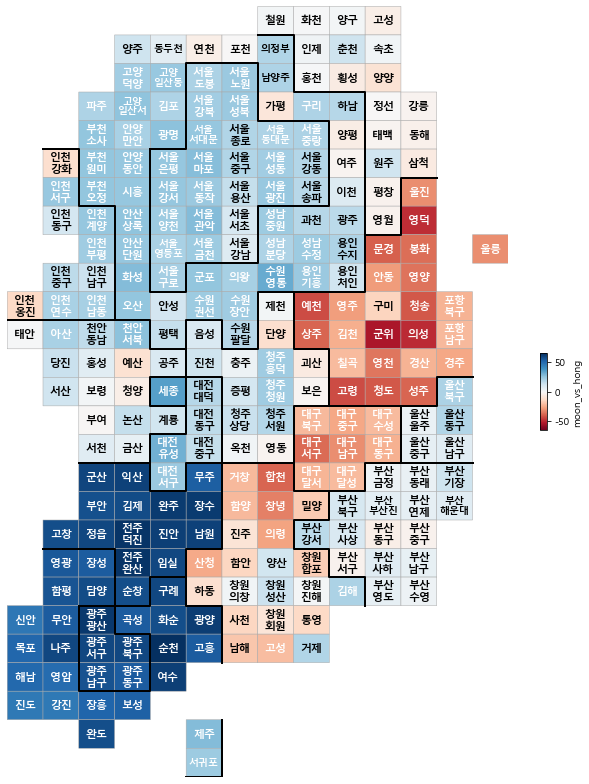

In [82]:
drawKorea2('moon_vs_hong', final_elect_data, 'RdBu')

- 전라남도, 전라북도의 앞도적인 지지율이 눈에 띄며, 서울, 경기권도 대부분 문재인 후보의 지지율이 더 높게 나타남
- 경상북도에서 홍준표 후보의 높은 지지율이 나타나며, 경상남도 대구, 합천 등에서도 높은 지지율을 나타냄
    - 하지만, 경상남도 울산, 부산, 창원, 김해 등에서는 문재인 후보의 지지율이 더 높은게 나타남

## 문재인 후보 vs 안철수 후보 - 득표율 격차 시각화

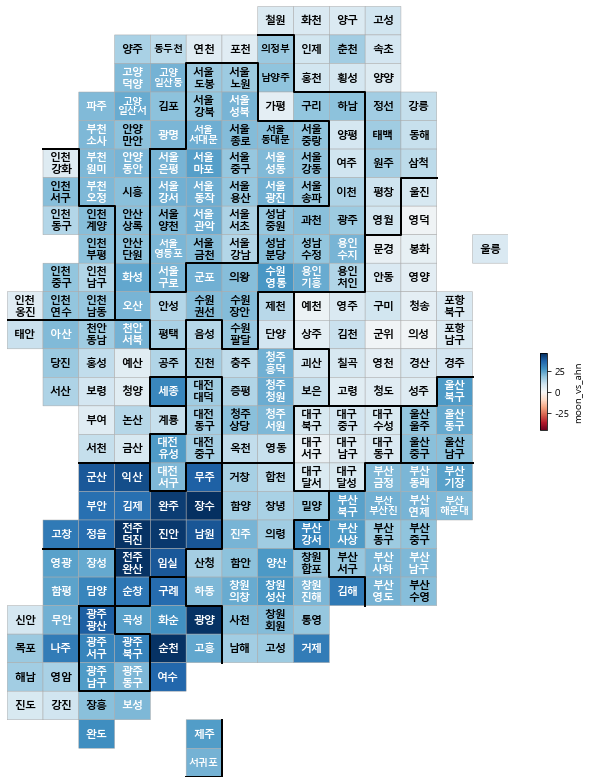

In [83]:
drawKorea2('moon_vs_ahn', final_elect_data, 'RdBu')

- 전반적으로 대다수의 지역에서 문재인 후보의 지지율이 더 높게 나타남

## 안철수 후보 vs 홍준표 후보 - 득표율 격차 시각화

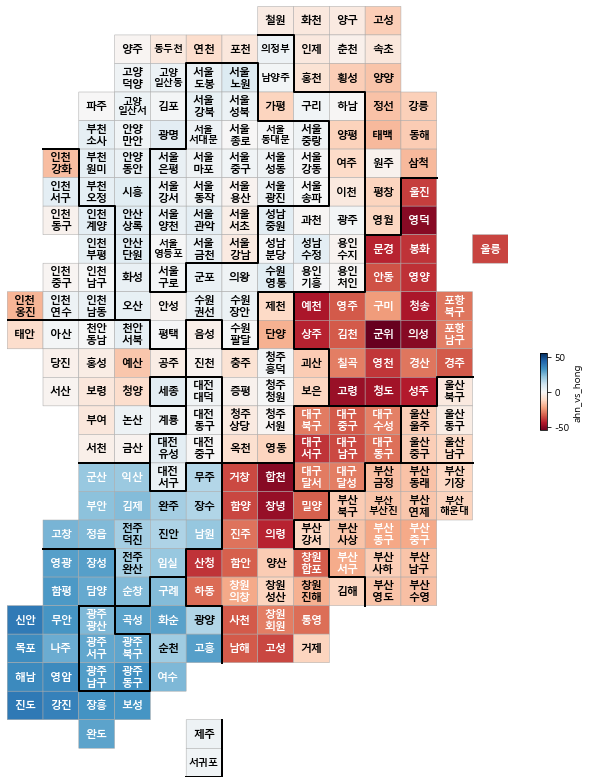

In [84]:
drawKorea2('ahn_vs_hong', final_elect_data, 'RdBu')

- 안철수 후보는 전라북도, 남도에서 높은 지지율을 보임
- 홍준표 후보는 경상북도, 남도, 강원도에서 높은 지지율을 보임
- 서울, 경기, 충정도 지역에서는 대부분 지지율의 극명한 차이가 나타나지 않고 비슷함 

## Folium을 이용한 시각화 - 문재인 후보 vs 홍준표 후보 - 득표율 격차 시각화

In [85]:
import folium
import json

In [86]:
pop_folium = final_elect_data.set_index('ID')   # 기준 컬럼이 index여야 Folium에서 잘 인식함

del pop_folium['광역시도']
del pop_folium['시군']

pop_folium

,pop,moon,hong,ahn,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
ID,,,,,,,,,,,,
서울 종로,102566.0,42512.0,22325,22313,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
서울 중구,82852.0,34062.0,17901,19372,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
서울 용산,148157.0,58081.0,35230,32109,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
서울 성동,203175.0,86686.0,40566,45674,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
서울 광진,240030.0,105512.0,46368,52824,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664
...,...,...,...,...,...,...,...,...,...,...,...,...
제주,273163.0,125717.0,48027,55971,46.022704,17.581810,20.489964,25,5,28.440894,25.532741,2.908154
서귀포,101296.0,43776.0,20036,21890,43.215922,19.779656,21.609935,26,5,23.436266,21.605986,1.830280
부천 소사,79899.0,181259.0,경기도,부천시,44.080018,18.489932,23.593679,4,2,25.590086,20.486339,5.103747


In [94]:
geo_path = 'data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location = [36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
              data = pop_folium['moon_vs_hong'],
              columns = [pop_folium.index, pop_folium['moon_vs_hong']], # 매칭 기준 id, 표현할 값/수치
              fill_color = 'PuBu', # PuRd, YlGnBu
              key_on ='feature.id')
map

- 경상북도, 경상남도 일부 지역을 제외한 대부분의 지역에서 문재인 후보의 득표율이 더 높은 것을 알 수 있음